# Processing Time Series Data



(240,)
['2017-09-18T00:37' '2017-09-18T01:37' '2017-09-18T02:37'
 '2017-09-18T03:37' '2017-09-18T04:37']


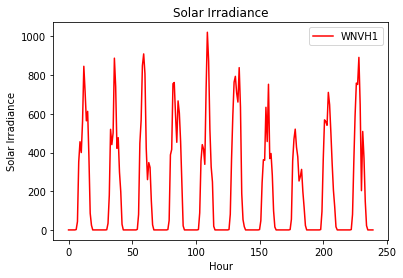

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sqlite3
import pprint

conn = sqlite3.connect('mesowest.db')
curs = conn.cursor()

attr = 'solar_radiation_set_1'

curs.execute('SELECT Date_Time, ' + attr + ' FROM weather ' + \
             'WHERE Station_ID = \'WNVH1\' AND ' + 
             'Date_Time >= Date(\'2017-09-18\') ' +
             'AND Date_Time <= DATE(\'2017-09-28\');')
data =  curs.fetchall()
time = np.array( [t for t,s in data ], dtype='datetime64')
solar = np.array( [float(s) for t,s in data ])

print(solar.shape)
print(time[:5])
#print(solar)

plt.plot(range(len(solar)), solar,'r', label='WNVH1')
plt.xlabel("Hour")
plt.ylabel("Solar Irradiance")
plt.title("Solar Irradiance")
plt.legend()
plt.show()

## Discrete Fourier Transform

To analyze the frequency domain.

* The spike at zero is the average amplitude of the signal
* The spike at 1 cycle per day correspond to the daily peak
* There is another spike at 2 cycles per day which is interesting ...

(240,)
(240,)


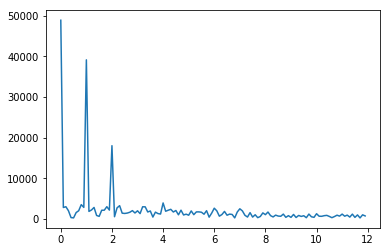

In [34]:
fc = np.fft.fft(solar)

# default unit of freq is cycles per hour since our data is hourly
#freq = np.fft.fftfreq(len(solar))
# change unit of freq to cycles per day 
freq = np.fft.fftfreq(len(solar), d=1.0/24.0)
print(fc.shape)
print(freq.shape)
# print (freq)
plt.plot(freq[:int(len(solar)/2)], np.abs(fc)[0:int(len(solar)/2)])
plt.show()

## One way of removing seasonality 

* Find the average daily irradiance vector for the data set
* Subtract the daily average from the data

How would you deal with the annual seasonality?

[   0.     0.     0.     0.     0.     0.     2.    65.3  340.5  498.1
  582.8  622.3  700.4  631.3  497.6  475.7  302.8  145.    21.2    0.     0.
    0.     0.     0. ]


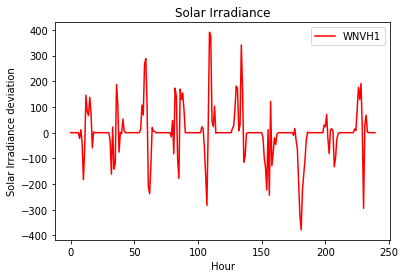

In [35]:
daily = solar.reshape((10,24))
# sanity check
#print(daily[0,:])
#print(solar[:24])

# find the daily mean vector
dailymean = np.zeros(24)
for s in daily:
    dailymean += s / 10.0

print(dailymean)

# subtract daily mean from data
deviation = []
for s in daily:
    deviation.extend(s - dailymean)

# plot the deviation from daily mean model
plt.plot(range(len(deviation)), deviation,'r', label='WNVH1')
plt.xlabel("Hour")
plt.ylabel("Solar Irradiance deviation")
plt.title("Solar Irradiance")
plt.legend()
plt.show()

Oftentimes, applying data mining/ machine learning techniques on the deviation data set yields better results.